<a href="https://colab.research.google.com/github/LeonelThurler/Python/blob/main/Ejercicios_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - EFECTO FOTOELÉCTRICO

## INTRODUCCIÓN

Escriba una introducción al Efecto Fotoeléctrico. Trate de explicar a grandes rasgos en qué contexto histórico se desarrolló, quiénes fueron los científicos involucrados en el descubrimiento y de qué trata la experiencia.

*El efecto fotoeléctrico fue observado por primera vez por el físico alemán Heinrich Hertz en 1887. Hertz lo descubrió accidentalmente, durante el experimento de un oscilador (mediante el cual buscaba generar ondas electromagnéticas) al observar que el arco que salta entre dos electrodos conectados a alta tensión alcanza distancias mayores cuando se iluminan con luz ultravioleta que cuando se dejan en la oscuridad. Luego, el alemán Philipp Lenard (1862-1947) describió este fenómeno, llamado efecto fotoeléctrico, como la emisión de electrones por parte de las superficies metálicas cuando sobre ellas incide luz visible o ultravioleta. J.J. Thomson (creador del modelo atómico que lleva su apellido en 1904) identificó estas chispas como electrones excitados saliendo de la superficie del metal.*
*La explicación del efecto fotoeléctrico fue el trabajo principal citado cuando se le concedió el premio Nobel de Física en 1921 a Albert Einstein (1879-1955). La explicación de Einstein, propuesta en 1905, desempeñó un papel importante en el desarrollo de la física atómica. Basó su teoría en una hipótesis muy atrevida, ya que pocos de los detalles experimentales se conocían en 1905. Además, el punto clave de la explicación de Einstein contradecía las ideas clásicas de la época. Einstein asumió que la energía de la luz no estaba distribuida uniformemente en todo el frente de onda en expansión (como suponía la teoría clásica). En cambio, la energía de la luz se concentraría en “paquetes” separados. La cantidad de energía en cada uno de estos paquetes no sería una cantidad cualquiera, sino una cantidad definida de energía que es proporcional a la frecuencia ‘f’ de la onda luminosa.*

*Presentamos a continuación una cita del mismo Einstein en al artículo original de 1905, en traducción libre y con la notación adaptada a la que venimos utilizando:*


[…]*De acuerdo con la idea de que la luz incidente se compone de cuantos con energía “h.f”, la expulsión de los rayos catódicos (fotoelectrones) por luz se puede entender de la siguiente manera. Los cuantos de energía penetran en la capa superficial del cuerpo y su energía se convierte, al menos en parte, en energía cinética de electrones. La imagen más simple es que un cuanto de luz cede toda su energía a un solo electrón; Asumiremos que esto sucede. Un electrón provisto de energía cinética dentro del cuerpo puede haber perdido parte de su energía cinética en el momento en que llega a la superficie. Además, se debe suponer que cada electrón, al abandonar el cuerpo, tiene que realizar una cantidad de trabajo W (que es característica del cuerpo). Los electrones expulsados directamente desde la superficie y en ángulos rectos tendrán las mayores velocidades perpendiculares a la superficie. La energía cinética máxima de uno de estos electrones es:*
*Ecmax = hf – W […]*


*Siendo esta ultima la ecuación fotoeléctrica.*
*La energía cinética de los fotoelectrones (electrones generados por efecto fotoeléctrico) es mayor que cero solo cuando la energía del fotón (h.f) es mayor que el trabajo W, que es el trabajo que debe realizar el electrón contra las fuerzas de atracción del material en el que se encuentra para escapar de él. La energía requerida para escapar del material se conoce como la función de trabajo. Por lo tanto, solo se puede emitir un electrón cuando la frecuencia de la luz incidente es mayor que un cierto valor mínimo que corresponde al trabajo requerido para escapar del material. La frecuencia mínima o umbral (fo) viene definida para cada material por la igualdad "h.fo = W".*
*Según el modelo fotónico de la luz de Einstein, es un fotón individual de frecuencia ‘f’ el que expulsa a un electrón si f > f0 . Como la intensidad de la luz es proporcional al número de fotones en el haz de luz y el número de fotoelectrones expulsados es proporcional al número de fotones incidentes en la superficie, la cantidad de electrones expulsados (y con ella la corriente fotoeléctrica) es proporcional a la intensidad de la luz incidente.*
*En el modelo de Einstein, la energía luminosa se concentra en una serie de cuantos de luz (fotones). Por tanto no se necesita tiempo para que el electrón acumule energía luminosa. En efecto, los cuantos transfieren su energía inmediatamente a los fotoelectrones, que escapan de la superficie casi inmediatamente.*
*Finalmente, la ecuación fotoeléctrica predice que cuanto mayor sea la frecuencia de la luz incidente mayor será la energía cinética máxima de los electrones expulsados. Esto es así porque la energía del fotón es directamente proporcional a la frecuencia de la luz. La energía mínima necesaria para expulsar un electrón es la energía requerida para que el electrón escape de la superficie del material. Esto explica por qué la luz de una frecuencia menor que la frecuencia ‘fo’ no puede expulsar ningún electrón. La energía cinética del electrón que se escapa es la diferencia entre la energía del fotón absorbido y la energía perdida por el electrón al escapar de la superficie: si la primera no compensa a la segunda el electrón no escapa del material.*

## DESARROLLO DEL TRABAJO

Dada una fotocélula con cátodo de Potasio y ánodo de Platino (o algún otro metal), se dispone un experimento con una configuración como la explicada en el apunte teórico.<br>
<br>
En primer lugar, se cuenta con una lámpara de mercurio y varios filtros para permitir sólo el paso de ciertas longitudes de onda provenientes de la misma. Fijando el filtro amarillo, e iniciando con un potencial de frenado $U = 0$, varíe la tensión con el reóstato hasta comprobar que no hay más corriente en el amperímetro (y un poco más). A medida que cambia de valor de tensión, anote tensión y corriente. La tensión deberá ser tomada con signo negativo (es decir, si lee 1V, debe anotar -1V), por convención. <br>
<br>
Esta parte de la práctica será con intensidad de la luz constante.

<hr>

<b><u>Nota 2021:</u></b> damos una tabla de valores por no poder medir en el laboratorio. La ley que sigue esta curva es de la forma $i(v) = A.(e^{B.(v + C)}-0.899)$. Se deben hallar los parámetros A, B y C.<br>
<br>
<table>
  <thead>
    <tr><th colspan=2>Color amarillo (578 nm)</th></tr>
    <tr><th>Tensión (V)</th><th>Corriente (pA)</th></tr>
  </thead>
    <tr><th>-3.00000</th><th>-7.37166</th></tr>
    <tr><th>-2.73333</th><th>-7.37154</th></tr>
    <tr><th>-2.46667</th><th>-7.37106</th></tr>
    <tr><th>-2.20000</th><th>-7.36926</th></tr>
    <tr><th>-1.93333</th><th>-7.36248</th></tr>
    <tr><th>-1.66667</th><th>-7.33693</th></tr>
    <tr><th>-1.40000</th><th>-7.24064</th></tr>
    <tr><th>-1.13333</th><th>-6.87778</th></tr>
    <tr><th>-0.86667</th><th>-5.51042</th></tr>
    <tr><th>-0.60000</th><th>-0.35770</th></tr>
    <tr><th>-0.59444</th><th>-0.16114</th></tr>
    <tr><th>-0.58889</th><th>0.04093</th></tr>
    <tr><th>-0.58333</th><th>0.24866</th></tr>
    <tr><th>-0.57778</th><th>0.46221</th></tr>
    <tr><th>-0.57222</th><th>0.68175</th></tr>
    <tr><th>-0.56667</th><th>0.90744</th></tr>
    <tr><th>-0.56111</th><th>1.13945</th></tr>
    <tr><th>-0.55556</th><th>1.37797</th></tr>
    <tr><th>-0.55000</th><th>1.62317</th></tr>
    <tr><th>-0.48889</th><th>4.81903</th></tr>
    <tr><th>-0.42778</th><th>9.15038</th></tr>
    <tr><th>-0.36667</th><th>15.02066</th></tr>
    <tr><th>-0.30556</th><th>22.97663</th></tr>
    <tr><th>-0.24444</th><th>33.75934</th></tr>
    <tr><th>-0.18333</th><th>48.37314</th></tr>
    <tr><th>-0.12222</th><th>68.17920</th></tr>
    <tr><th>-0.06111</th><th>95.02232</th></tr>
</table>

Cte A: 8.19987
Cte B: 4.97488
Cte C: 0.5686


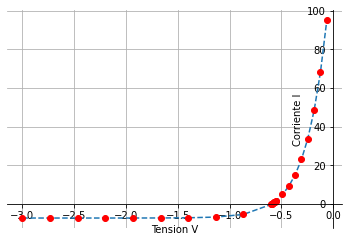

In [ ]:
# aca va la curva tensión de frenado versus la corriente observada
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from scipy import optimize
from scipy.optimize import curve_fit

# Datos del ejercicio
v = np.array([-3.00000, -2.73333, -2.46667, -2.20000, -1.93333, -1.66667, -1.40000, -1.13333, -0.86667, -0.60000, -0.59444, -0.58889, -0.58333, -0.57778, -0.57222, -0.56667, -0.56111, -0.55556, -0.55000, -0.48889, -0.42778, -0.36667, -0.30556, -0.24444, -0.18333, -0.12222, -0.06111])
i = np.array([-7.37166,-7.37154,-7.37106,-7.36926,-7.36248,-7.33693,-7.24064,-6.87778,-5.51042,-0.35770,-0.16114,0.04093,0.24866,0.46221,0.68175,0.90744,1.13945,1.37797,1.62317,4.81903,9.15038,15.02066,22.97663,33.75934,48.37314,68.17920,95.02232])

#Funcion del problema
def func(v, a, b, c):
  return a*(np.exp(b*(v+c)) - 0.899)

#Utilizo la funcion curve_fit para averiguar los parametros A,B y C
parametros, params_covariance = optimize.curve_fit (func,v,i)
c=parametros[2]
b=parametros[1]
a=parametros[0]
print("Cte A:",round(a,5))
print("Cte B:",round(b,5))
print("Cte C:",round(c,5))

#Ejes del grafico
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Grafica
plt.plot(v, func(v,a,b,c),"--")
plt.xlabel("Tension V")
plt.ylabel("Corriente I")
plt.plot(v, i, "o", color = "red")
plt.grid(True)
plt.show()

En segundo lugar, determine el valor de $U_0$ hallando el primer valor de tensión en el cual la corriente se hace cero. Hay varias formas de determinar este potencial, algunas de las cuales son más precisas que otras. Para este trabajo, consideraremos el cruce de la curva con el eje de las abcisas (o sea, la tensión $U$).

In [ ]:
# aca va el valor de U0
import sympy as sp
import pandas as pd
import numpy as np

a= 8.199867537851476
b= 4.974883206482456
c= 0.5686006042389258
def samesign(a, b):
        return a * b > 0

def biseccion(funci, inferior, superior):
    assert not samesign(funci(inferior), funci(superior))
    for i in range(54):
        c = (inferior + superior) / 2.0
        if samesign(funci(inferior), funci(c)):
            inferior = c
        else:
            superior = c
    return c

def f(v):
        return a*(np.exp(b*(v+c)) - 0.899)

v = biseccion(f, -0.75, -0.5)
print ("El valor de V0 es",round(v,5),"para que la funcion sea", round(f(v),5))

El valor de V0 es -0.59 para que la funcion sea 0.0


Ahora proceda a hallar un valor de $U_0$ para cada 
filtro de color.<br>
<br>
La ley que sigue la curva del color verde (546 nm) es de la forma $i(v) = A.(e^{B.(v + C)}-0,5201)$. Se deben hallar los parámetros A, B y C (si se calcularon para el amarillo, son los mismos, sólo hay que despejar el valor de $v$ cuando $i(v) = 0$, o sea, puede no usarse la tabla).<br>
Debe realizarse el gráfico de la curva, a partir de la ley.
<br>
<table>
  <thead>
    <tr><th colspan=2>Color verde (546 nm)</th></tr>
    <tr><th>Tensión (V)</th><th>Corriente (pA)</th></tr>
  </thead>
    <tr><th>-3.00000</th><th>-4.26472</th></tr>
    <tr><th>-2.75556</th><th>-4.26461</th></tr>
    <tr><th>-2.51111</th><th>-4.26425</th></tr>
    <tr><th>-2.26667</th><th>-4.26301</th></tr>
    <tr><th>-2.02222</th><th>-4.25884</th></tr>
    <tr><th>-1.77778</th><th>-4.24476</th></tr>
    <tr><th>-1.53333</th><th>-4.19725</th></tr>
    <tr><th>-1.28889</th><th>-4.03696</th></tr>
    <tr><th>-1.04444</th><th>-3.49615</th></tr>
    <tr><th>-0.80000</th><th>-1.67147</th></tr>
    <tr><th>-0.78333</th><th>-1.44728</th></tr>
    <tr><th>-0.76667</th><th>-1.20371</th></tr>
    <tr><th>-0.75000</th><th>-0.93908</th></tr>
    <tr><th>-0.73333</th><th>-0.65158</th></tr>
    <tr><th>-0.71667</th><th>-0.33922</th></tr>
    <tr><th>-0.70000</th><th>0.00014</th></tr>
    <tr><th>-0.68333</th><th>0.36884</th></tr>
    <tr><th>-0.66667</th><th>0.76941</th></tr>
    <tr><th>-0.65000</th><th>1.20461</th></tr>
    <tr><th>-0.57778</th><th>3.56916</th></tr>
    <tr><th>-0.50556</th><th>6.95595</th></tr>
    <tr><th>-0.43333</th><th>11.80693</th></tr>
    <tr><th>-0.36111</th><th>18.75512</th></tr>
    <tr><th>-0.28889</th><th>28.70717</th></tr>
    <tr><th>-0.21667</th><th>42.96173</th></tr>
    <tr><th>-0.14444</th><th>63.37888</th></tr>
    <tr><th>-0.07222</th><th>92.62285</th></tr>
    <tr><th>0.00000</th><th>134.50970</th></tr>
</table>

Cte A: 8.1998
Cte B: 4.97491
Cte C: 0.5686
El valor de V0 es -0.70001 para que la corriente sea 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


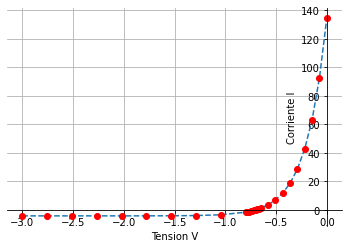

In [ ]:
# aca va el valor de U0 para el verde y la grafica
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import sympy as sp
import pandas as pd
from scipy import optimize
from scipy.optimize import curve_fit

# Datos del ejercicio
v = np.array([-3.00000,-2.75556,-2.51111,-2.26667,-2.02222,-1.77778,-1.53333,-1.28889,-1.04444,-0.80000,-0.78333,-0.76667,-0.75000,-0.73333,-0.71667,-0.70000,-0.68333,-0.66667,-0.65000,-0.57778,-0.50556,-0.43333,-0.36111,-0.28889,-0.21667,-0.14444,-0.07222,0.00000])
i = np.array([-4.26472,-4.26461,-4.26425,-4.26301,-4.25884,-4.24476,-4.19725,-4.03696,-3.49615,-1.67147,-1.44728,-1.20371,-0.93908,-0.65158,-0.33922,0.00014,0.36884,0.76941,1.20461,3.56916,6.95595,11.80693,18.75512,28.70717,42.96173,63.37888,92.62285,134.50970])

#Funcion del problema
def func(v, a, b, c):
  return a*(np.exp(b*(v+c)) - 0.5201)

#Utilizo la funcion curve_fit para averiguar los parametros A,B y C
parametros, params_covariance = optimize.curve_fit (func,v,i)
c=parametros[2]
b=parametros[1]
a=parametros[0]
print("Cte A:",round(a,5))
print("Cte B:",round(b,5))
print("Cte C:",round(c,5))

#Utilizo el metodo de biseccion para encontrar la tension que hace que la corriente sea 0
def samesign(a, b):
        return a * b > 0

def biseccion(funci, inferior, superior):
    assert not samesign(funci(inferior), funci(superior))
    for i in range(54):
        c = (inferior + superior) / 2.0
        if samesign(funci(inferior), funci(c)):
            inferior = c
        else:
            superior = c
    return c

def f(t):
        return a*(np.exp(b*(t+c)) - 0.5201)

t = biseccion(f, -3, -0.5)
print ("El valor de V0 es",round(t,5),"para que la corriente sea",round(f(t),5))

#Ejes del grafico
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Grafica
plt.plot(v, func(v,a,b,c),"--")
plt.xlabel("Tension V")
plt.ylabel("Corriente I")
plt.plot(v, i, "o", color = "red")
plt.grid(True)
plt.show()

La ley que sigue la curva del color azul (436 nm) es de la forma $i(v) = A.(e^{B.(v + C)}-0,0372)$. Los parámetros A, B y C son los mismos que para el verde.<br>
Debe realizarse el gráfico de la curva, a partir de la ley.
<br>

El valor de V0 es -1.23021 para que la corriente sea -0.0


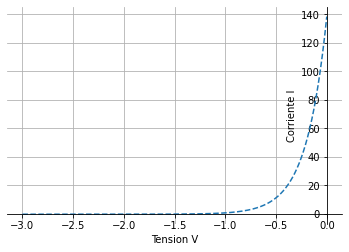

In [ ]:
# aca va el valor de U0 para el azul y la grafica
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import sympy as sp
import pandas as pd

#Constantes halladas anteriormente
a= 8.199802068589333
b= 4.974911282052066
c= 0.5686002548158544

#Utilizo el metodo de biseccion para encontrar la tension que hace que la corriente sea 0
def samesign(a, b):
        return a * b > 0

def biseccion(funci, inferior, superior):
    assert not samesign(funci(inferior), funci(superior))
    for i in range(54):
        c = (inferior + superior) / 2.0
        if samesign(funci(inferior), funci(c)):
            inferior = c
        else:
            superior = c
    return c

def f(t):
        return a*(np.exp(b*(t+c)) - 0.0372)

t = biseccion(f, -3, -0.5)
print ("El valor de V0 es",round(t,5),"para que la corriente sea",round(f(t),5))

#Ejes del grafico
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Grafica
v= np.linspace(-3, 0, 1000)
plt.plot(v, f(v),"--")
plt.xlabel("Tension V")
plt.ylabel("Corriente I")
plt.grid(True)
plt.show()

La ley que sigue la curva del color violeta (405 nm) es de la forma $i(v) = A.(e^{\frac{B}{2}.(v - \frac{C}{2})}-0,0159)$. Los parámetros A, B y C son los mismos que para el verde.<br>
Debe realizarse el gráfico de la curva, a partir de la ley.
<br>

El valor de V0 es -1.38064 para que la corriente sea -0.0


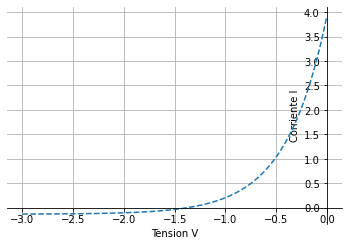

In [ ]:
# aca va el valor de U0 para el violeta y la grafica
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import sympy as sp
import pandas as pd

#Constantes halladas anteriormente
A= 8.199802068589333
B= 4.974911282052066
C= 0.5686002548158544

#Utilizo el metodo de biseccion para encontrar la tension que hace que la corriente sea 0
def samesign(a, b):
        return a * b > 0

def biseccion(funci, inferior, superior):
    assert not samesign(funci(inferior), funci(superior))
    for i in range(54):
        c = (inferior + superior) / 2.0
        if samesign(funci(inferior), funci(c)):
            inferior = c
        else:
            superior = c
    return c

def f(t):
        return a*(np.exp((b/2)*(t-c/2)) - 0.0159)

t = biseccion(f, -3, -0.5)
print ("El valor de V0 es",round(t,5),"para que la corriente sea",round(f(t),5))

#Ejes del grafica
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Grafica
v= np.linspace(-3, 0, 1000)
plt.plot(v, f(v),"--")
plt.xlabel("Tension V")
plt.ylabel("Corriente I")
plt.grid(True)
plt.show()

Si todos los pasos fueron ejecutados correctamente, deberá tener una tabla de frecuencias (expresadas en $\text{[THz]} = 10^{\text{12}} \text{[Hz]}$) contra tensiones de corte $U_0$ (expresadas en $\text{[Volt]}$).<br>
<br>
En estas condiciones, arme un gráfico X-Y, colocando en X las frecuencias y en Y las tensiones contenidas en la tabla, cambiando el signo de las tensiones (de negativas a positivas, también, por convención) y agregando el error producto de la medición tal cual se explica más abajo. Ajuste una recta a todos los puntos y halle:
- Pendiente
- Cruce con el eje X (frecuencias)
- Ordenada al origen

<br><b>Error en tensiones:</b> si bien estamos considerando formas matemáticas para las curvas de tensión y corriente, estas tensiones pueden ser medidas (como hacemos con el color amarillo). Por este motivo, a las tensiones halladas hay que agregarles el error instrumental (despreciamos el de operación). Consideraremos el error de los instrumentos analógicos (mínima división sobre 2) y lo fijaremos en 0,1 V.

<br>¿Por qué no consideramos error en las frecuencias? Piense en las magnitudes y unidades de la frecuencia y ensaye una explicación.

Pendiente: 3.6346E-15
Ordenada: -1.2924
Raíz: 3.5558E+14


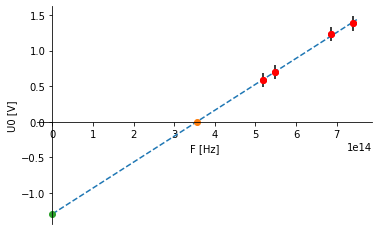

In [ ]:
# aca va la grafica de ajuste

import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as C
import pylab as pl

#escribo las frecuencias, en valores de longitud de onda(um) y despejo la frecuencia (f=c/lambda) 
F = C.c / np.array ([0.578e-6,0.546e-6,0.436e-6,0.405e-6])
U0 = np.array ([0.5900,0.7000,1.2302,1.3806])
dU = np.array ([0.1,0.1,0.1,0.1])

def linefit_chi(F, U0, dU):
  F_prom = (F / (dU**2)).sum() / (1 / (dU**2)).sum()
  U_prom = (U0 / (dU**2)).sum() / (1 / (dU**2)).sum()
  m = (U0 / (dU**2) * (F - F_prom)).sum() / (F / (dU**2) * (F - F_prom)).sum()
  b = U_prom - m * F_prom
  return m, b


#Ejes del grafico
ax = pl.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))


def abline_chi(m, b, F, U0, dU):
  
  F_x = np.linspace (0,7.5e14,1000)
  
  U_vals = m * F_x + b

  #Gráfico
  plt.figure(1, figsize = (6,4))
  plt.plot(F, U0, 'o', color = 'red')
  plt.plot(F_x, U_vals, '--')
  plt.plot(-b/m,0,"o")  #intersección con el eje x
  plt.plot(0,b,"o")     #ordenada al origen
  plt.xlabel ("F [Hz]")
  plt.ylabel ("U0 [V]")
  plt.errorbar(F, U0, fmt = 'ro', xerr = 0, yerr = dU, ecolor = 'black')
  plt.show()

m, b = linefit_chi(F, U0, dU)
raiz = -b/m
print("Pendiente: {:.4E}".format(m))
print("Ordenada: {:.4f}".format(b))
print("Raíz: {:.4E}".format(raiz))
abline_chi(m, b, F, U0, dU)

Indique:
- ¿Qué significa la ordenada al origen multiplicada por la carga del electrón?
- ¿Qué significa el punto donde la curva cruza por el eje de las abcisas?
- Valor de la constante de Planck junto con su error.
- Calidad del ajuste R^2.

In [ ]:
# aca van las soluciones de las preguntas y la cte. de Planck

* ¿Qué significa la ordenada al origen multiplicada por la carga del electrón? Es el trabajo de extracción, este valor de energia es característico del material.

utilizando las ecuaciones:

E= Q* U0 = (h/q * f - Ua)*Q

E=(h*f-Ea)

si nos ubicamos en la ordenada al origen significa que la frecuencia(f) es igual a 0, entonces:

E = (h*0 - Ea)

E = -Ea

Es decir se obtiene el trabajo de extraccion

* ¿Qué significa el punto donde la curva cruza por el eje de las abcisas?  Es el valor de Frecuencia umbral promedio, es decir la frecuencia en la que se empieza a evidenciar el efectoelectrico. 

haciendo calculos:

U0 = h*f/Q - Ua

si la funcion esta sobre el eje x ( frecuecia) siginifica que su imagen (U0) es igual a 0v.

Entonces:

0= h*f/Q- Ua

h*f/Q = Ua

y para que se produsca el efecto fotoelectrico 
h*f/Q >= Ua

* Valor de la constante de Planck junto con su error:

la pendiente(m) del grafico es U0/f que se puede expresar como h/Q

m=U0/f=h/Q    [J*s /C]

entonces para obtener la constante de plank debo multiplicar a la pendiente por el modulo de la carga del electron, pero se debe tener en cuenta que h es una medida.

El error de m es igual a :

delta_m= |deriv(m)/deriv(h)|*delta_H = |deriv(h/Q)/deriv(h)| * delta_h

delta_m = delta_h/Q

entonces h = (m0 +- delta_m)*Q

         h = (h0/Q +- delta_h/Q)*Q
         
         h = (h0 +-delta_h)

reemplazando con los datos:
        h = (5.82E-34 +/- 8.66E-35) J*s    




In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as C

F = C.c / np.array ([0.578e-6,0.546e-6,0.436e-6,0.405e-6])
U0 = np.array ([0.5900,0.7000,1.2302,1.3806])
dU = np.array ([0.1,0.1,0.1,0.1])

Q=1.602176E-19
pend= 3.6346E-15
Uint= -1.2924
h0=pend*Q

# Calcula los errores en los coeficientes
def err_parametros(pend, yint,x,y, dy):
  x_medio = (x / (dy*2)).sum() / (1 / (dy*2)).sum()
  d_pend = np.sqrt(1 / ((x - x_medio) * (x / (dy**2))).sum())  
  d_yint = np.sqrt(d_pend * (np.sum((x**2) / (dy**2)) / np.sum(1 / (dy**2))))
  print("error de la ordenada al origen = ({:.2E} ) ".format(d_yint))   
  return d_pend

dh=err_parametros(pend,Uint,F,U0, dU)
dh=dh*Q
print("h = ({:.2E} +/- {:.2E}) J*s".format(h0,dh))


error de la ordenada al origen = (1.47E+07 ) 
h = (5.82E-34 +/- 8.66E-35) J*s


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as C

F = C.c / np.array ([0.578e-6,0.546e-6,0.436e-6,0.405e-6])
U0 = np.array ([0.5900,0.7000,1.2302,1.3806])

pend= 3.6346E-15
Uint= -1.2924

def r2(pend, Uint, F, U0): 
  # Devuelve el R^2 del ajuste lineal 
  yhat = Uint + pend * F
  ybar = U0.mean()
  ssreg = np.sum((yhat - ybar) ** 2) 
  sstot = np.sum((U0 - ybar) ** 2)
  return ssreg / sstot

r2=r2(pend,Uint,F,U0)
print("Calidad del ajuste R^2: {:.4f}".format(r2))


Calidad del ajuste R^2: 0.9981


Usando este <a href="https://phet.colorado.edu/es/simulation/photoelectric">simulador</a>, probaremos qué pasa con distintos materiales y con distintas intensidades de luz (requiere Java). De no poder ejecutarlo en el navegador, pruebe descargando la <i>aplicación .jar</i> a su computadora y ejecutándola local.<br>
<br>
<i>1) Seleccione sodio, luz al 100% y longitud de onda de 400 nm. La tensión de corte está en -0.8V. En estas condiciones, varíe la intensidad de la luz. Registre su observación.<br>
2) Ahora, ubique el dial de tensión en -0.4V y luz al 100%. Registre su observación.<br>
3) Por último, con el dial de tensión en -0.4V, varíe la intensidad lumínica de 100% a 80%, 60% y 40%. Registre sus observaciones.</i><br>
<br>
Con todos estos registros y junto a la teoría, ¿qué conclusiones puede obtener?<br>
<br>
<i>1) Seleccione sodio, luz al 100% y longitud de onda en 300 nm. La tensión de corte está en -1.8V. En estas condiciones, seleccione calcio y registre dónde se ubica la nueva tensión de corte.<br>
2) Vuelva al sodio y coloque el dial de tensión en 0V, registrando la corriente. Una vez hecho esto, cambie a calcio y registre la nueva corriente.</i><br>
<br>
Con todos estos registros y junto a la teoría, ¿qué conclusiones puede obtener?


In [ ]:
# aca van las respuestas (usar una celda de texto y escribir en cursiva)

*En este experimento sometimos unas placas de sodio el cual se le refleja una luz con una determinada frecuencia que genera una corriente fotoeléctrica. Esto es debido a la energía que porta la luz (onda electromagnética) que logra liberar un electrón por cada fotón y con la energía restante hacer mover al electrón (energía cinética). O sea, mayor intensidad luminica la corriente crece. 
Por otra parte si la frecuencia de la luz aumenta, (longitud de onda más chica) esta portara más energía (E=h.f) por lo cual los electrones liberados tendran mas energía cinética. 
En el primer caso con un potencial de -0,8V y una logitud de onda de 400nm la corriente es nula pero a medida que variamos el potencial de frenado positivamente la corriente aumenta como es logico pero cuando disminuimos la intensidad luminica la corrinte disminuye.
Para el segundo caso el potencial de frenado del sodio para una logitud de onda de 300nm es de -1,8V mientras que para el calcio ese potencial de frenado es de -1,4V esa diferencia tiene que ver con la facilidad que tiene cada material para ceder electrones para la conduccion, con el sodio es mas facil sacar electrones que para el calcio por lo tanto necesito menor potencial de frenado. Por eso cuando anulo el potencial de frenado la corriente en el caso del sodio es mas alta que para el calcio*

## CONCLUSIONES

Intente resumir los resultados del trabajo, resaltando lo que le pareció más importante. Vincule los resultados con el Efecto Fotoeléctrico según lo que describió en la Introducción de este TP.

In [ ]:
# aca van las conclusiones (usar una celda de texto y escribir en cursiva)

*Como se pudo observar a lo largo del TP el fenomeno fotoelectrico se da cuando un material fotosensible se lo ilumina con un haz de luz que con una determinada frecuencia ioniza el material extrayendo o liberando fotoelectrones, que en el circuito los vemos reflejados en una corriente, aprendimos que esta corriente electrica depende de la intensidad de la luz incidente y la energia cinetica de los electrones liberados depende de la frecuencia de esta luz incidente, para notar este efecto, se aplicó un potencial de frenado mediante una fuente de tension que a mayor potencial de frenado, mayor energía cinética necesitan los electrones para poder circular, tambien notamos que a medida que cambiamos de material fotosensible este potencial de frenado variaba ya que en algunos materiales es mas dificil hacer circular estos fotoelectrones por lo que esta tension iba a ser menor en estos casos.*